In [3]:
import pandas as pd

In [7]:
reddit_df = pd.read_csv('data/raw/Reddit_Data.csv')
twitter_df = pd.read_csv('data/raw/Twitter_Data.csv')
reddit_df = reddit_df.rename(columns={'clean_comment': 'clean_text'})
combined_df = pd.concat([twitter_df, reddit_df], ignore_index=True)
combined_df.to_csv('data/processed/Combined_Data.csv', index=False)

In [9]:
df = pd.read_csv('data/processed/Combined_Data.csv')

(200229, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  200125 non-null  object 
 1   category    200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [13]:
df.isnull().sum()

clean_text    104
category        7
dtype: int64

In [16]:
df = df.dropna()

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [23]:
df[(df['clean_text'] == '') | (df['clean_text'].str.strip() == '')]

,clean_text,category
77224,,0.0
167412,\n,0.0
173572,,0.0
179153,,0.0
195129,\n,0.0
197939,,0.0


In [24]:
df = df[df['clean_text'].str.strip() != '']

In [29]:
df['clean_text'] = df['clean_text'].str.lower()
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df[df['clean_text'].apply(lambda x: x.startswith(' ') or x.endswith(' '))]


,clean_text,category
1,talk all the nonsense and continue all the dra...,0.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0
...,...,...
200221,let the janta decide not ulema clerics,0.0
200222,hona hai same with vaccination education insu...,0.0
200226,downvote karna tha par upvote hogaya,0.0
200227,haha nice,1.0


In [ ]:

url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
df[df['clean_text'].str.contains(url_pattern, regex=True)]


,clean_text,category


In [35]:
#check if any text has a '\n'
comments_with_newline = df[df['clean_text'].str.contains('\n')]
comments_with_newline

#remove newlines
df['clean_text'] = df['clean_text'].str.replace('\n', ' ')

# EDA

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

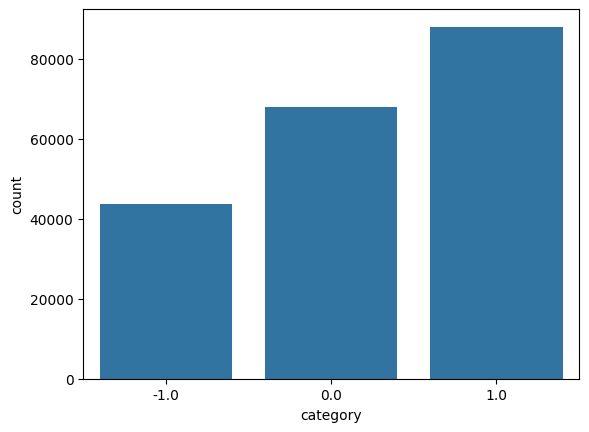

In [40]:
sns.countplot(x='category', data=df)

In [42]:
# frequency distribution

df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1.0    44.06
 0.0    34.03
-1.0    21.91
Name: proportion, dtype: float64

In [43]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

In [46]:
df['word_count'].describe()

count    199702.000000
mean         21.852560
std          26.541971
min           1.000000
25%          10.000000
50%          18.000000
75%          29.000000
max        1307.000000
Name: word_count, dtype: float64

(0.0, 1350.0)

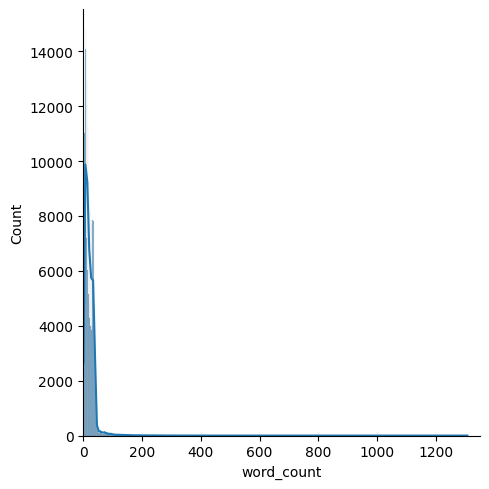

In [ ]:
sns.displot(df['word_count'], kde=True)
plt.xlim(0, 1350)

(0.0, 1350.0)

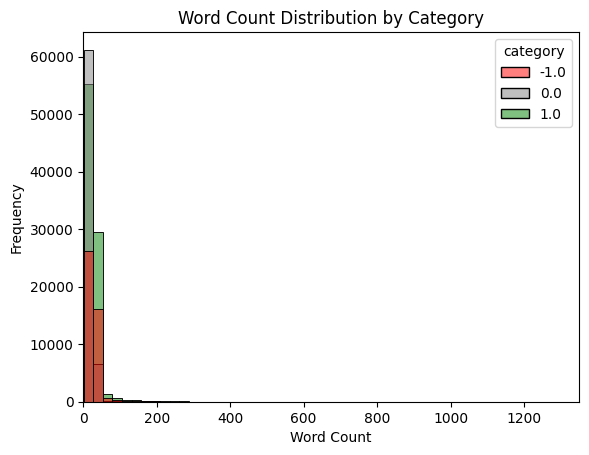

In [61]:
plot_df = df[df['word_count'] <= 1350]
sns.histplot(data=plot_df, x='word_count', hue='category', bins=50,
             palette={1.0: 'green', -1.0: 'red', 0.0: 'gray'}, multiple='layer')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution by Category')
plt.xlim(0, 1350)

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['stopword_count'] = df['clean_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [67]:
df.sample(5)

,clean_text,category,word_count,stopword_count
14919,new initiative fly modi style 5yrs awaiting ar...,1.0,12,1
85312,watch punish those who let you down modi uttar...,-1.0,10,4
50205,priyalankamodisafe india safe modi had becom i...,1.0,37,5
170209,thats what don understand many myths say that ...,-1.0,60,22
82463,btw prasad bharati not under vice president it...,0.0,15,5


(0.0, 50.0)

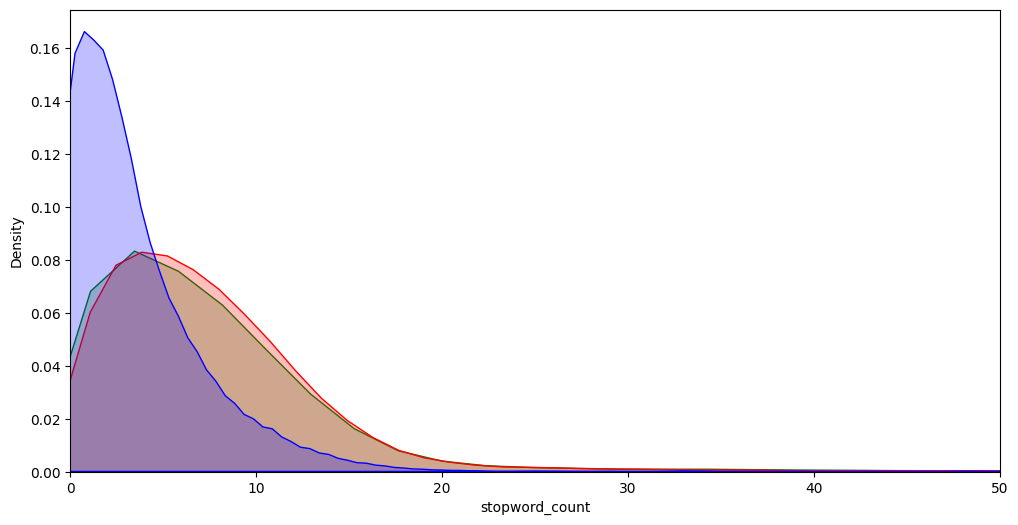

In [73]:
#distribution of stop words
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['category']==1]['stopword_count'], fill='True', color='green')
sns.kdeplot(df[df['category']==-1]['stopword_count'], fill='True', color='red')
sns.kdeplot(df[df['category']==0]['stopword_count'], fill='True', color='blue')
plt.xlim(0, 50)


In [74]:
df['num_chars'] = df['clean_text'].apply(len)
df.head()

,clean_text,category,word_count,stopword_count,num_chars
0,when modi promised “minimum government maximum...,-1.0,33,12,210
1,talk all the nonsense and continue all the dra...,0.0,13,7,68
2,what did just say vote for modi welcome bjp t...,1.0,22,9,117
3,asking his supporters prefix chowkidar their n...,1.0,34,15,212
4,answer who among these the most powerful world...,1.0,14,4,81


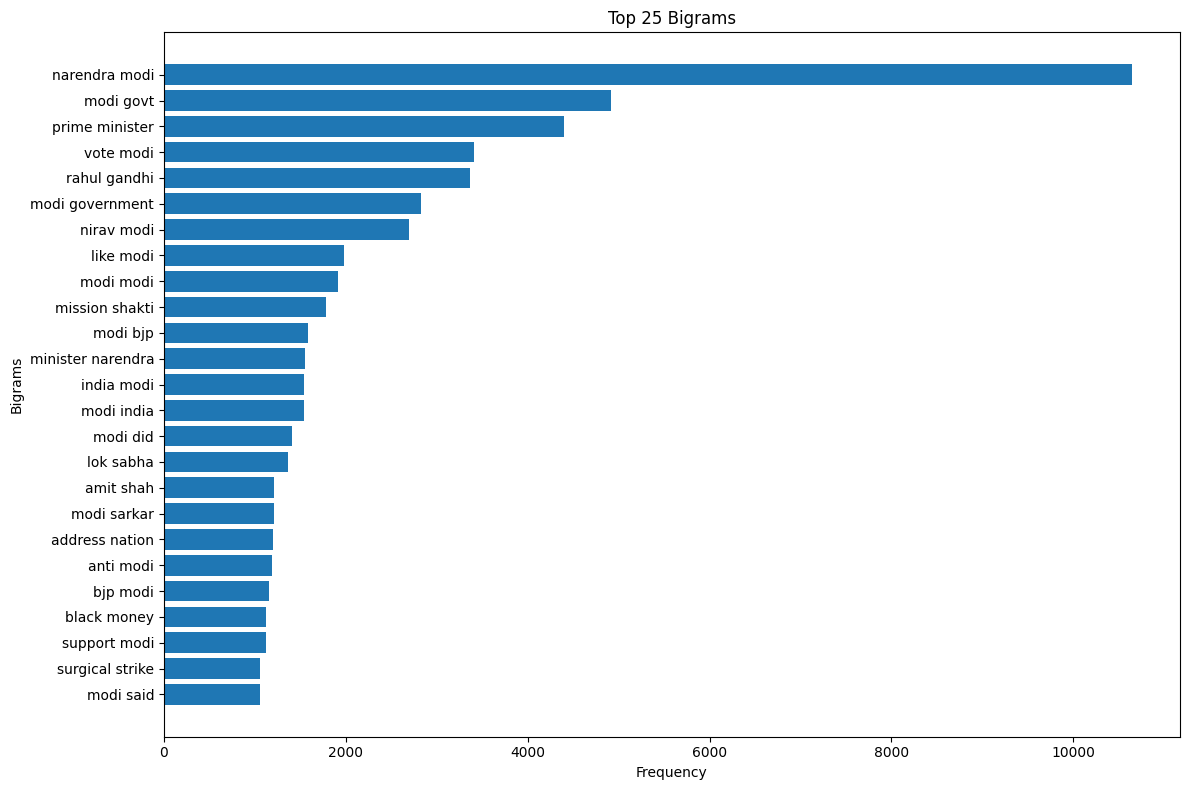

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngrams(text_series, ngram_range=(2, 2), top_n=25):
    """
    Extract top N n-grams from a pandas Series of text using CountVectorizer.
    
    Parameters:
    - text_series: pandas Series containing text data
    - ngram_range: tuple, e.g., (2, 2) for bigrams
    - top_n: int, number of top n-grams to return
    
    Returns:
    - dict: top n-grams and their counts
    """
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text_series)
    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    
    # Create a dictionary of ngram: count
    ngram_dict = dict(zip(ngram_features, ngram_counts))
    
    # Sort by count descending and get top N
    sorted_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return dict(sorted_ngrams)

# Get top 25 bigrams
top_bigrams = get_top_ngrams(df['clean_text'], ngram_range=(2, 2), top_n=25)

# Plot the top 25 bigrams
plt.figure(figsize=(12, 8))
plt.barh(list(top_bigrams.keys())[::-1], list(top_bigrams.values())[::-1])  # Reverse for descending order
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 25 Bigrams')
plt.tight_layout()
plt.show()

In [78]:
# Analyze sentiment association for top 25 bigrams
# For each bigram, count unique sentences (rows) where it appears exactly once, grouped by sentiment

sentiment_counts = {}

for bigram in top_bigrams.keys():
    # Find rows where the bigram appears exactly once (to avoid duplicates within sentences)
    mask = df['clean_text'].str.contains(bigram, case=False, regex=False) & \
           (df['clean_text'].str.count(bigram) == 1)
    subset = df[mask]
    
    # Count sentiments in the subset
    counts = subset['category'].value_counts()
    
    # Map categories to labels
    sentiment_counts[bigram] = {
        'Positive (1)': counts.get(1.0, 0),
        'Neutral (0)': counts.get(0.0, 0),
        'Negative (-1)': counts.get(-1.0, 0)
    }

# Display the results
for bigram, counts in sentiment_counts.items():
    print(f"Bigram: '{bigram}'")
    print(f"  Positive: {counts['Positive (1)']}")
    print(f"  Neutral: {counts['Neutral (0)']}")
    print(f"  Negative: {counts['Negative (-1)']}")

Bigram: 'narendra modi'
  Positive: 5185
  Neutral: 3850
  Negative: 1802
Bigram: 'modi govt'
  Positive: 2300
  Neutral: 1267
  Negative: 1273
Bigram: 'prime minister'
  Positive: 2284
  Neutral: 1243
  Negative: 679
Bigram: 'vote modi'
  Positive: 377
  Neutral: 429
  Negative: 197
Bigram: 'rahul gandhi'
  Positive: 1498
  Neutral: 969
  Negative: 829
Bigram: 'modi government'
  Positive: 1277
  Neutral: 871
  Negative: 637
Bigram: 'nirav modi'
  Positive: 1059
  Neutral: 1207
  Negative: 622
Bigram: 'like modi'
  Positive: 909
  Neutral: 567
  Negative: 450
Bigram: 'modi modi'
  Positive: 510
  Neutral: 370
  Negative: 205
Bigram: 'mission shakti'
  Positive: 984
  Neutral: 546
  Negative: 230
Bigram: 'modi bjp'
  Positive: 370
  Neutral: 248
  Negative: 225
Bigram: 'minister narendra'
  Positive: 740
  Neutral: 519
  Negative: 238
Bigram: 'india modi'
  Positive: 498
  Neutral: 185
  Negative: 139
Bigram: 'modi india'
  Positive: 435
  Neutral: 265
  Negative: 168
Bigram: 'modi did

In [87]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))-{'not', 'no', 'nor', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","but","however","yet"}

In [89]:
df['clean_text'] = df['clean_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [90]:
df.head()

,clean_text,category,word_count,stopword_count,num_chars
0,modi promised “minimum government maximum gove...,-1.0,33,12,210
1,talk nonsense continue drama vote modi,0.0,13,7,68
2,say vote modi welcome bjp told rahul main camp...,1.0,22,9,117
3,asking supporters prefix chowkidar names modi ...,1.0,34,15,212
4,answer among powerful world leader today trump...,1.0,14,4,81


In [ ]:
#lemmatizer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['clean_text'] = df['clean_text'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...


,clean_text,category,word_count,stopword_count,num_chars
0,modi promised “minimum government maximum gove...,-1.0,33,12,210
1,talk nonsense continue drama vote modi,0.0,13,7,68
2,say vote modi welcome bjp told rahul main camp...,1.0,22,9,117
3,asking supporter prefix chowkidar name modi gr...,1.0,34,15,212
4,answer among powerful world leader today trump...,1.0,14,4,81


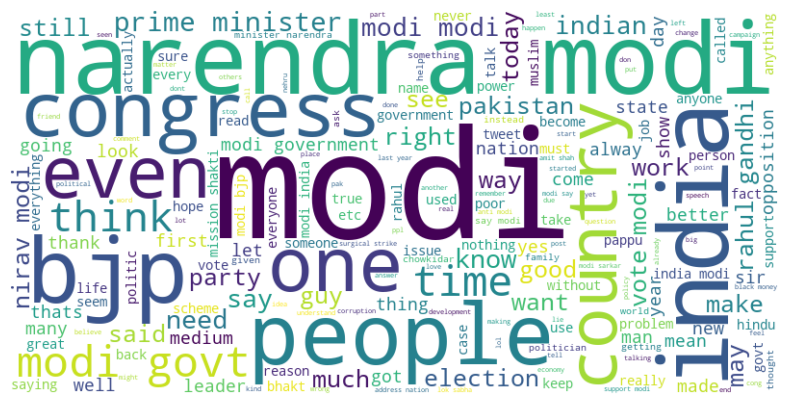

In [93]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_wordcloud(' '.join(df['clean_text']))

In [96]:
processed_df = df[['clean_text', 'category']]
processed_df.to_csv('data/processed/Preprocessed_Data.csv', index=False)